In [5]:
import numpy as np
import cv2
from commonfunctions import *
from skimage import io
from skimage.filters import gaussian, laplace
from skimage.morphology import disk, octagon
from skimage.color import rgb2gray 


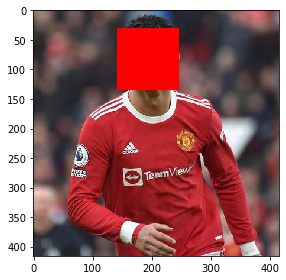

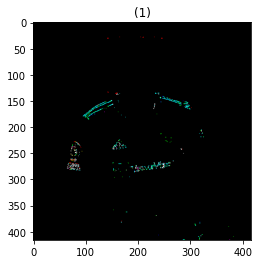

In [25]:
# multiple cascades: https://github.com/Itseez/opencv/tree/master/data/haarcascades

# https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml
face_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
# https://github.com/Itseez/opencv/blob/master/data/haarcascades/haarcascade_eye.xml
eye_cascade = cv2.CascadeClassifier(
    cv2.data.haarcascades + 'haarcascade_eye.xml')
# nose_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_mcs_nose.xml')


img = io.imread('r.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)


for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), 255, -1)
    io.imshow(img)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    # img = gaussian(img, 0.5)
    # img = laplace(img)
    blur = cv2.GaussianBlur(img,(3,3),0)
    # Apply Laplacian operator in some higher datatype
    laplacian = np.abs(cv2.Laplacian(blur,cv2.CV_64F))
    thresh = np.max(laplacian)*0.4
    laplacian[laplacian < thresh] = 0
    laplacian[laplacian > thresh] = 1
    show_images([laplacian])


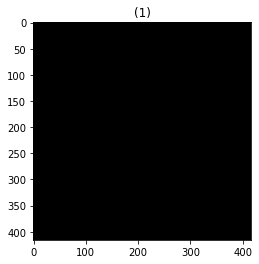

In [26]:
seNoise = disk(1)
seClose = octagon(7, 4)
